In [1]:
import numpy as np # for numerical operations
from prettytable import PrettyTable # for printing tables
from matplotlib import pyplot as plt # for plotting

In [ ]:
def show_history(histrory: dict):
    table = PrettyTable()
    for key in histrory.keys():
        table.add_column(key, histrory[key])
    print(table)
    
def plot_history(history: dict):
    plt.close('all')
    # Figure of subplots to show the 1. loss over epcohs  2. k over epochs near target_k=3 3. b over epochs near target_b=2 4. k_gradient over epochs 5. b_gradient over epochs 6. lr over epochs
    fig, axs = plt.subplots(3, 2, figsize=(12, 10))
    axs[0, 0].plot(history["epoch"], history["loss"])
    axs[0, 0].set_title("Loss over epochs")

    axs[0, 1].plot(history["epoch"], history["k"])
    axs[0, 1].set_title("k over epochs")
    axs[0, 1].axhline(y=3, color='r', linestyle='-', label="target k=3")
    axs[0, 1].legend()

    axs[1, 0].plot(history["epoch"], history["b"])
    axs[1, 0].set_title("b over epochs")
    axs[1, 0].axhline(y=2, color='r', linestyle='-', label="target b=2")
    axs[1, 0].legend()

    axs[1, 1].plot(history["epoch"], history["k_gradient"])
    axs[1, 1].set_title("k_gradient over epochs")

    axs[2, 0].plot(history["epoch"], history["b_gradient"])
    axs[2, 0].set_title("b_gradient over epochs")

    axs[2, 1].plot(history["epoch"], history["lr"])
    axs[2, 1].set_title("lr over epochs")

    plt.tight_layout()
    plt.show()

In [3]:
history = {
    "epoch": [],
    "loss": [],
    "k": [],
    "b": [],
    "k_gradient": [],
    "b_gradient": [],
    "lr": [],
}

TARGET_K = 3
TARGET_B = 2

x = np.array([0, 1, 2, 3, 4, 5])
y = TARGET_K * x + TARGET_B

In [4]:
EPOCHS = 100
k = 0.5
b = 0.5
k_lr = 0.001
b_lr = 0.001

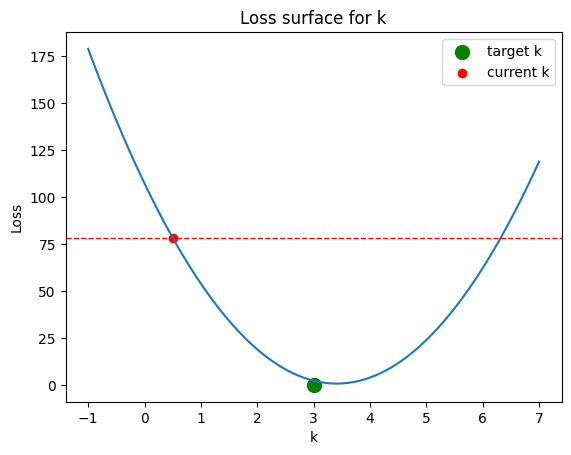

In [5]:
# create a figure that represents a gradient pool for k
# how? we will plot the loss funciton for different k values and then place current k value on the plot to see where it is
# for b, we will do later

k_pool = np.linspace(-k * 10, k * 10, 100)
k_pool = np.linspace(TARGET_K - 4, TARGET_K + 4, 100)

losses = []
for k_ in k_pool:
    y_pred = k_ * x + b
    loss = np.mean((y - y_pred) ** 2)
    losses.append(loss)


# we already have the losses for k_pool
def plot_k_loss_surface(k):
    loss = np.mean((y - k * x - b) ** 2)

    plt.plot(k_pool, losses)
    
    plt.axhline(y=loss, color='r', linestyle='--', linewidth=1)
    plt.scatter(TARGET_K, 0, color="g", label="target k", s=100)
    plt.scatter(k, loss, color="r", label="current k")

    plt.legend()
    plt.xlabel("k")
    plt.ylabel("Loss")
    plt.title("Loss surface for k")
    plt.show()


plot_k_loss_surface(k)

## Starts here the main loop

In [6]:
prev_k_gradient = 0
prev_b_gradient = 0



for epoch in range(EPOCHS):
    y_pred = k * x + b

    loss = np.mean((y - y_pred) ** 2)

    k_gradient = -2 * np.mean(x * (y - y_pred))
    b_gradient = -2 * np.mean(y - y_pred)


    
    # if epoch > 0 :
    #     if abs(k_gradient) < abs(prev_k_gradient):
    #         lr = lr * 1.5
    #         print("increasing K lr to", lr)
    #     if abs(b_gradient) < abs(prev_b_gradient):
    #         lr = lr * 1.5
    #         print("increasing B lr to", lr)
    
    # b_lr = b_lr * 0.5
    # k_lr = k_lr * 0.5
    b_threshold = 0.1
    if  abs(prev_b_gradient) - abs(b_gradient) < 0.1:
        b_lr = b_lr * 1.2
    k_threshold = 0.1
    if  abs(prev_k_gradient) - abs(k_gradient) < 0.1:
        k_lr = k_lr * 1.2
    print(b_gradient - prev_b_gradient)
    # print(k_gradient - prev_k_gradient)
    
    k = k - k_gradient * k_lr
    b = b - b_gradient * b_lr


    

    prev_k_gradient = k_gradient
    prev_b_gradient = b_gradient

    history["epoch"].append(epoch)
    history["k"].append(k)
    history["b"].append(b)
    history["loss"].append(loss)
    history["k_gradient"].append(k_gradient)
    history["b_gradient"].append(b_gradient)
    history["lr"].append(b_lr)

-15.5
0.35720000000000063
0.3487447199999991
0.3404897478719988
0.3324303381526299
0.32456185780264235
0.3168797835435164
0.3093796992571036
0.30205729344691434
0.2949083567595441
0.28792877956482066
0.28111454959325144
0.2744617496294932
0.2679665552604167
0.26162523267655047
0.2554341365256061
0.24938970781683167
0.24348847187505918
0.23772703634317516
0.23210208923194386
0.22661039701601027
0.221248802775051
0.2160142243789025
0.21090365271572686
0.2059141499621706
0.2010428478944295
0.196286946239427
0.19164371106495715
0.18711047320805108
0.1826846267405049
0.17836362747081935
0.17414499148158402
0.17002629370154487
0.16600516651147945
0.16207929838312207
0.15824643255029613
0.1545043657115759
0.15085094676365962
0.14728407556472423
0.14380170172713846
0.14040182343871876
0.1370824863119493
0.13384178226043986
0.1306778484020139
0.12758886598779462
0.12457305935662877
0.12162869491431394
0.11875408013699573
0.1159475625981683
0.11320752901874354
0.11053240433960276
0.1079206508161

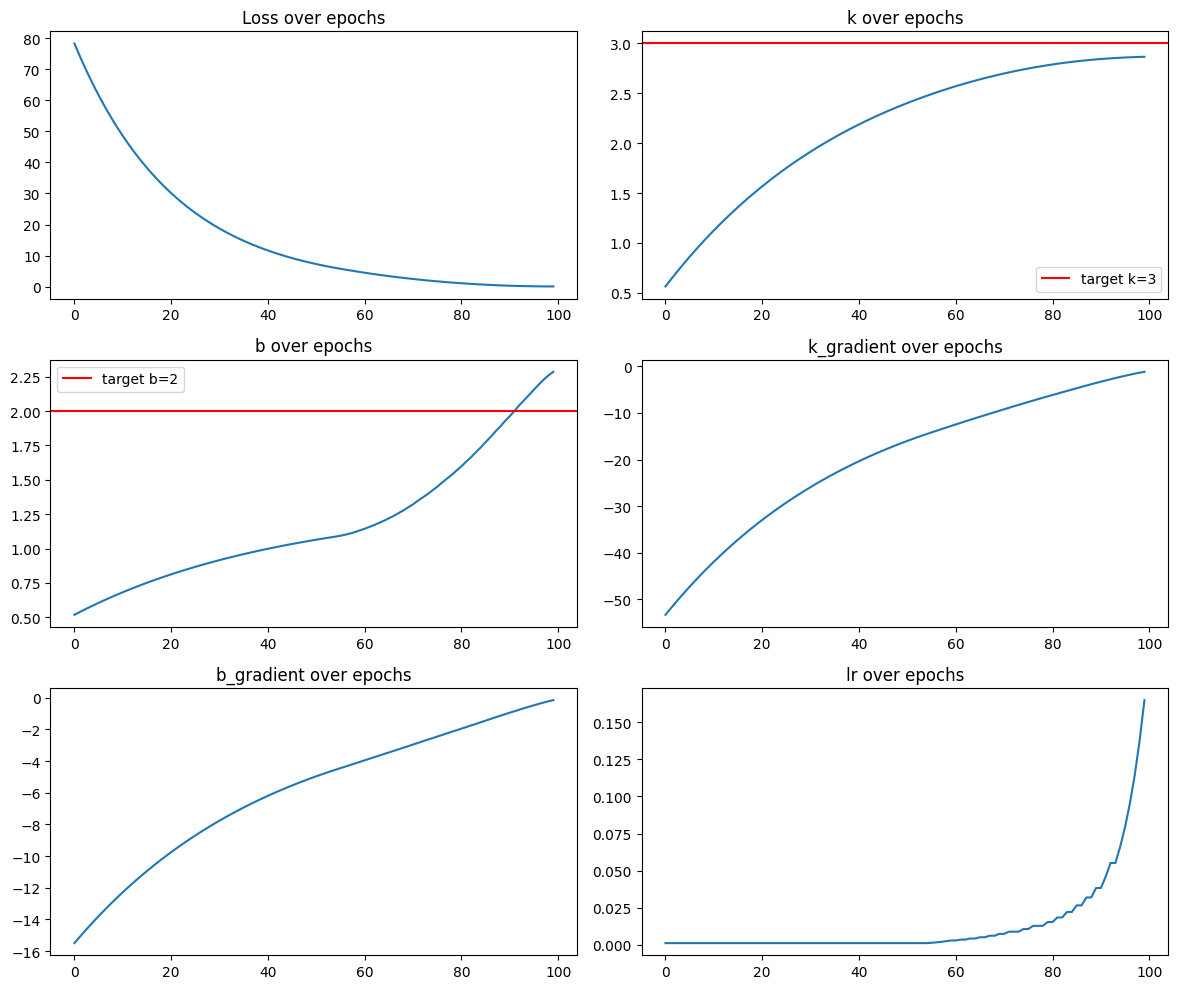

In [7]:
plot_history(history)

In [8]:
show_history(history)

+-------+---------------------+--------------------+--------------------+---------------------+----------------------+-----------------------+
| epoch |         loss        |         k          |         b          |      k_gradient     |      b_gradient      |           lr          |
+-------+---------------------+--------------------+--------------------+---------------------+----------------------+-----------------------+
|   0   |  78.29166666666667  | 0.5640000000000001 |       0.5186       | -53.333333333333336 |        -15.5         |         0.0012        |
|   1   |     74.63387796     |     0.6264804      | 0.5367713599999999 |  -52.06700000000001 |       -15.1428       |         0.0012        |
|   2   |  71.14733750737777  |   0.68747720304    |   0.554524226336   |  -50.83066920000001 |     -14.79405528     |         0.0012        |
|   3   |  67.82402740005377  | 0.747025559215104  | 0.5718685049745535 |   -49.62363014592   | -14.453565532128001  |         0.0012        |